# Importing Libraries for Fuzzy Logic Control System

In [1]:
# Importing Required Libraries for Fuzzy Logic Control System
import numpy as np  # Importing NumPy for numerical operations and array manipulations
import skfuzzy as fuzz  # Importing the skfuzzy library for fuzzy logic operations
from skfuzzy import control as ctrl  # Importing the control module from skfuzzy for defining fuzzy variables and rules


# Defining Input and Output Variables with Membership Functions in Fuzzy Logic Control System

In [2]:
# Define the universe of discourse for input and output variables
# The universe of discourse defines the range of values for the input and output variables.

temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')  # Temperature input variable from 0 to 40 degrees
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')  # Humidity input variable from 0 to 100 percent
light_level = ctrl.Antecedent(np.arange(0, 101, 1), 'light_level')  # Light level input variable from 0 to 100 percent
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')  # Time of day input variable from 0 to 23 hours

# Output variables
# Defining output variables that represent the control actions based on the input variables.
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')  # Fan speed output variable from 0 to 100 percent
heater_power = ctrl.Consequent(np.arange(0, 101, 1), 'heater_power')  # Heater power output variable from 0 to 100 percent
blind_position = ctrl.Consequent(np.arange(0, 101, 1), 'blind_position')  # Blind position output variable from 0 to 100 percent
light_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'light_intensity')  # Light intensity output variable from 0 to 100 percent

# Define membership functions for inputs
# Membership functions define how each input variable is categorized into fuzzy sets.

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])  # Membership function for 'cold' temperature
temperature['comfortable'] = fuzz.trimf(temperature.universe, [15, 25, 35])  # Membership function for 'comfortable' temperature
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])  # Membership function for 'hot' temperature

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])  # Membership function for 'low' humidity
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])  # Membership function for 'medium' humidity
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])  # Membership function for 'high' humidity

light_level['dark'] = fuzz.trimf(light_level.universe, [0, 0, 50])  # Membership function for 'dark' light level
light_level['medium'] = fuzz.trimf(light_level.universe, [30, 50, 70])  # Membership function for 'medium' light level
light_level['bright'] = fuzz.trimf(light_level.universe, [60, 100, 100])  # Membership function for 'bright' light level

time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 0, 12])  # Membership function for 'morning' time
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [10, 15, 20])  # Membership function for 'afternoon' time
time_of_day['night'] = fuzz.trimf(time_of_day.universe, [18, 24, 24])  # Membership function for 'night' time

# Define membership functions for outputs
# Membership functions define how each output variable is categorized into fuzzy sets.

fan_speed['off'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])  # Membership function for 'off' fan speed
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])  # Membership function for 'low' fan speed
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])  # Membership function for 'high' fan speed

heater_power['off'] = fuzz.trimf(heater_power.universe, [0, 0, 50])  # Membership function for 'off' heater power
heater_power['low'] = fuzz.trimf(heater_power.universe, [0, 50, 100])  # Membership function for 'low' heater power
heater_power['high'] = fuzz.trimf(heater_power.universe, [50, 100, 100])  # Membership function for 'high' heater power

blind_position['closed'] = fuzz.trimf(blind_position.universe, [0, 0, 50])  # Membership function for 'closed' blind position
blind_position['half_open'] = fuzz.trimf(blind_position.universe, [0, 50, 100])  # Membership function for 'half open' blind position
blind_position['open'] = fuzz.trimf(blind_position.universe, [50, 100, 100])  # Membership function for 'open' blind position

light_intensity['off'] = fuzz.trimf(light_intensity.universe, [0, 0, 50])  # Membership function for 'off' light intensity
light_intensity['dim'] = fuzz.trimf(light_intensity.universe, [0, 50, 100])  # Membership function for 'dim' light intensity
light_intensity['bright'] = fuzz.trimf(light_intensity.universe, [50, 100, 100])  # Membership function for 'bright' light intensity


# Defining Fuzzy Rules for Control Actions in Fuzzy Logic System

In [3]:
# Define fuzzy rules for controlling the system based on input variables
rules = [  
    # Rules for heater power based on temperature and humidity
    ctrl.Rule(temperature['cold'] & humidity['low'], heater_power['high']),  
    ctrl.Rule(temperature['cold'] & humidity['medium'], heater_power['high']),  
    ctrl.Rule(temperature['cold'] & humidity['high'], heater_power['low']),  
    ctrl.Rule(temperature['comfortable'], heater_power['off']),  
    ctrl.Rule(temperature['hot'], heater_power['off']),  

    # Rules for fan speed based on temperature and humidity
    ctrl.Rule(temperature['hot'] & humidity['low'], fan_speed['high']),  
    ctrl.Rule(temperature['hot'] & humidity['medium'], fan_speed['high']),  
    ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['low']),  
    ctrl.Rule(temperature['comfortable'], fan_speed['off']),  
    ctrl.Rule(temperature['cold'], fan_speed['off']),  

    # Rules for blind position based on light level and time of day
    ctrl.Rule(light_level['dark'] & time_of_day['morning'], blind_position['open']),  
    ctrl.Rule(light_level['dark'] & time_of_day['afternoon'], blind_position['half_open']),  
    ctrl.Rule(light_level['dark'] & time_of_day['night'], blind_position['closed']),  
    ctrl.Rule(light_level['medium'], blind_position['half_open']),  
    ctrl.Rule(light_level['bright'], blind_position['closed']),  

    # Rules for light intensity based on light level and time of day
    ctrl.Rule(light_level['dark'] & time_of_day['morning'], light_intensity['bright']),  
    ctrl.Rule(light_level['dark'] & time_of_day['afternoon'], light_intensity['dim']),  
    ctrl.Rule(light_level['dark'] & time_of_day['night'], light_intensity['off']),  
    ctrl.Rule(light_level['medium'], light_intensity['dim']),  
    ctrl.Rule(light_level['bright'], light_intensity['off'])  
]

# Creating Control System and Simulation for Fuzzy Logic Environment

In [4]:
# Create control system and simulation for managing environmental conditions
environment_ctrl = ctrl.ControlSystem(rules)  # Initialize the control system with defined fuzzy rules
environment_simulation = ctrl.ControlSystemSimulation(environment_ctrl)  # Set up the simulation for the control system

# Visualizing Membership Functions and Rules Activation in Fuzzy Logic Control System

C:\Users\Legion\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


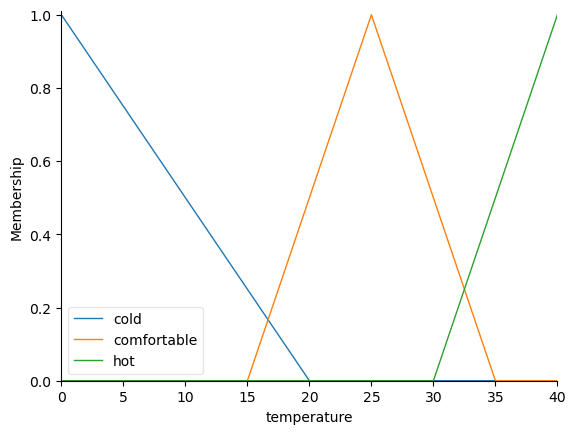

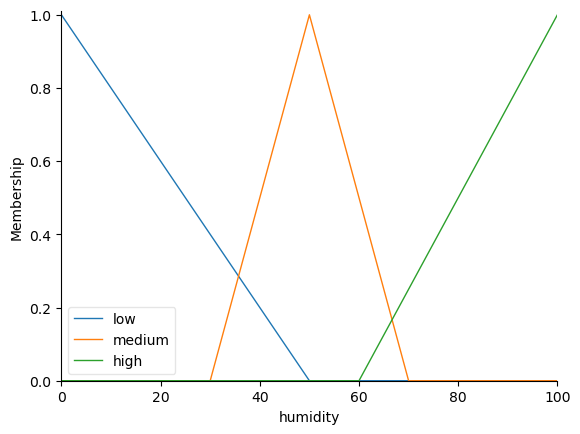

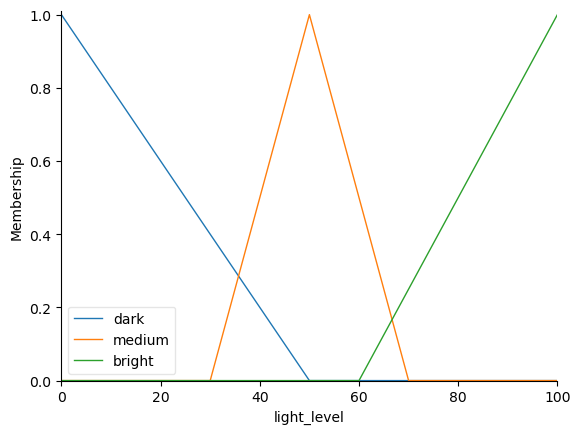

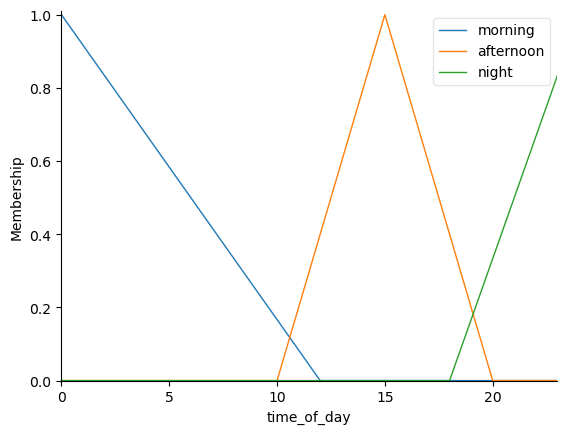

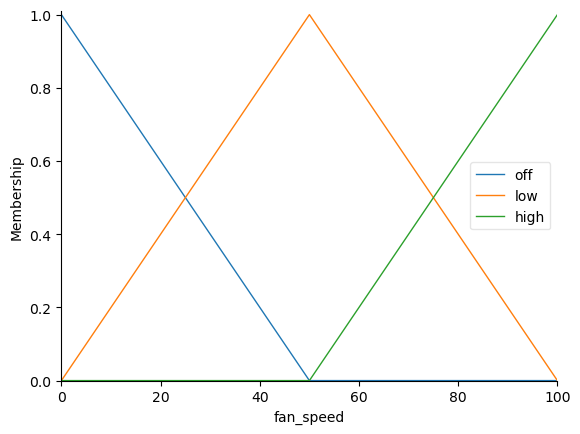

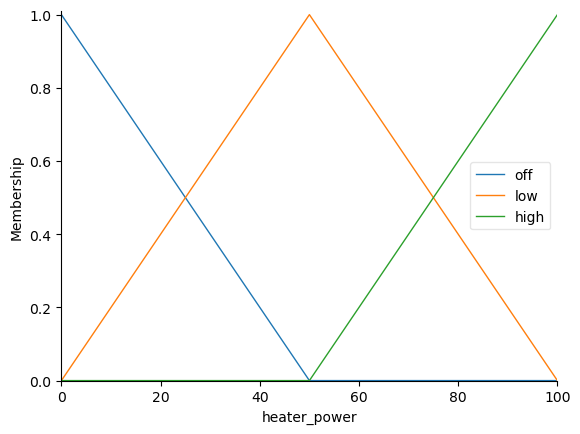

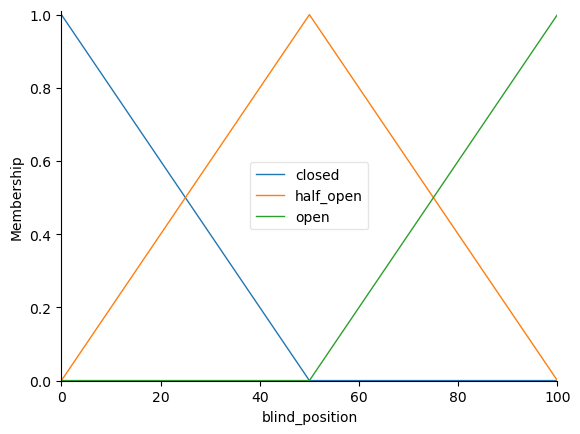

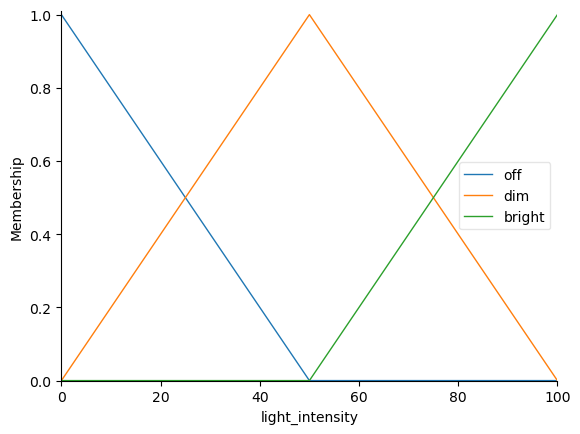

In [5]:
# Plot membership functions for input and output variables to visualize their activation
temperature.view()      # Plot the membership functions for the temperature variable
humidity.view()        # Plot the membership functions for the humidity variable
light_level.view()     # Plot the membership functions for the light level variable
time_of_day.view()     # Plot the membership functions for the time of day variable
fan_speed.view()       # Plot the membership functions for the fan speed output variable
heater_power.view()    # Plot the membership functions for the heater power output variable
blind_position.view()   # Plot the membership functions for the blind position output variable
light_intensity.view()  # Plot the membership functions for the light intensity output variable

# Inputting Sensor Values and Computing Outputs in Fuzzy Logic Control System

In [6]:
# Example one input values for sensors and computation of outputs based on fuzzy logic rules
input_temperature = 25  # Set example temperature input
input_humidity = 60     # Set example humidity input
input_light_level = 40  # Set example light level input
input_time_of_day = 14  # Set example time of day input

# Pass inputs to the ControlSystem for evaluation
environment_simulation.input['temperature'] = input_temperature  # Input the temperature value
environment_simulation.input['humidity'] = input_humidity        # Input the humidity value
environment_simulation.input['light_level'] = input_light_level  # Input the light level value
environment_simulation.input['time_of_day'] = input_time_of_day  # Input the time of day value

# Compute the output based on the fuzzy logic rules
environment_simulation.compute()  # Calculate the output values from the fuzzy system

# Print the outputs from the fuzzy control system
print(f"Fan Speed: {environment_simulation.output['fan_speed']}")       # Output the fan speed
print(f"Heater Power: {environment_simulation.output['heater_power']}") # Output the heater power
print(f"Blind Position: {environment_simulation.output['blind_position']}") # Output the blind position
print(f"Light Intensity: {environment_simulation.output['light_intensity']}") # Output the light intensity


# Example two input values for sensors to compute the environment control outputs
input_temperature = 30  # Set example temperature input
input_humidity = 70     # Set example humidity input
input_light_level = 30  # Set example light level input
input_time_of_day = 13  # Set example time of day input

# Pass inputs to the ControlSystem for evaluation
environment_simulation.input['temperature'] = input_temperature  # Input the temperature value
environment_simulation.input['humidity'] = input_humidity        # Input the humidity value
environment_simulation.input['light_level'] = input_light_level  # Input the light level value
environment_simulation.input['time_of_day'] = input_time_of_day  # Input the time of day value

# Compute the output based on the fuzzy logic rules
environment_simulation.compute()  # Calculate the output values from the fuzzy system

# Print the outputs from the fuzzy control system
print(f"Fan Speed: {environment_simulation.output['fan_speed']}")       # Output the fan speed
print(f"Heater Power: {environment_simulation.output['heater_power']}") # Output the heater power
print(f"Blind Position: {environment_simulation.output['blind_position']}") # Output the blind position
print(f"Light Intensity: {environment_simulation.output['light_intensity']}") # Output the light intensity


Fan Speed: 16.666666666666664
Heater Power: 16.666666666666664
Blind Position: 50.0
Light Intensity: 50.0
Fan Speed: 19.444444444444443
Heater Power: 19.444444444444443
Blind Position: 50.00000000000004
Light Intensity: 50.00000000000004


# Visualizing Control Surfaces for Environmental Management Using 3D Plots

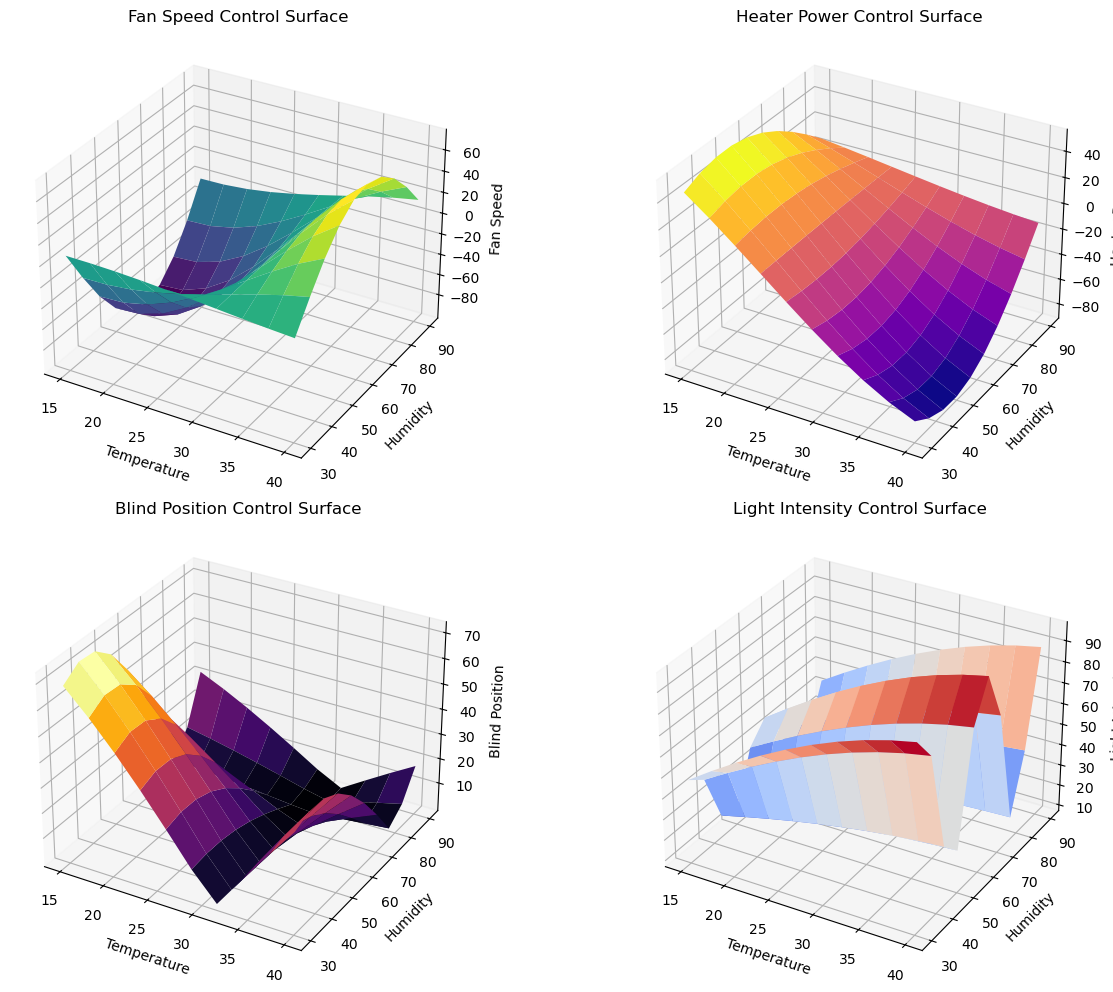

In [7]:
# Visualizing control surfaces for fan speed, heater power, blind position, and light intensity based on temperature and humidity
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Generate random input data for temperature and humidity
temperature = np.linspace(15, 40, 10)  # Temperature ranging from 15 to 40 degrees
humidity = np.linspace(30, 90, 10)      # Humidity ranging from 30 to 90 percent
light_level = np.linspace(0, 100, 10)   # (Unused in this plot but defined for completeness)
time_of_day = np.linspace(0, 24, 10)    # (Unused in this plot but defined for completeness)

# Meshgrid for 3D plots
T, H = np.meshgrid(temperature, humidity)  # Create a grid for temperature and humidity combinations

# Example functions for control surfaces
# These functions simulate control outputs based on temperature and humidity
fan_speed = np.sin(T / 10) * np.cos(H / 20) * 100       # Fan speed control surface function
heater_power = np.cos(T / 15) * np.sin(H / 30) * 100    # Heater power control surface function
blind_position = np.abs(np.cos(T / 20) * np.sin(H / 25)) * 100  # Blind position control surface function
light_intensity = np.abs(np.sin(T / 30) * np.cos(H / 10)) * 100  # Light intensity control surface function

# Plotting the control surfaces
fig = plt.figure(figsize=(14, 10))  # Create a figure with specified size

# Plot for Fan Speed
ax1 = fig.add_subplot(221, projection='3d')  # Add 3D subplot for fan speed
ax1.plot_surface(T, H, fan_speed, cmap='viridis')  # Plot fan speed surface
ax1.set_title('Fan Speed Control Surface')  # Title for fan speed plot
ax1.set_xlabel('Temperature')  # X-axis label
ax1.set_ylabel('Humidity')     # Y-axis label
ax1.set_zlabel('Fan Speed')    # Z-axis label

# Plot for Heater Power
ax2 = fig.add_subplot(222, projection='3d')  # Add 3D subplot for heater power
ax2.plot_surface(T, H, heater_power, cmap='plasma')  # Plot heater power surface
ax2.set_title('Heater Power Control Surface')  # Title for heater power plot
ax2.set_xlabel('Temperature')  # X-axis label
ax2.set_ylabel('Humidity')     # Y-axis label
ax2.set_zlabel('Heater Power') # Z-axis label

# Plot for Blind Position
ax3 = fig.add_subplot(223, projection='3d')  # Add 3D subplot for blind position
ax3.plot_surface(T, H, blind_position, cmap='inferno')  # Plot blind position surface
ax3.set_title('Blind Position Control Surface')  # Title for blind position plot
ax3.set_xlabel('Temperature')  # X-axis label
ax3.set_ylabel('Humidity')     # Y-axis label
ax3.set_zlabel('Blind Position')# Z-axis label

# Plot for Light Intensity
ax4 = fig.add_subplot(224, projection='3d')  # Add 3D subplot for light intensity
ax4.plot_surface(T, H, light_intensity, cmap='coolwarm')  # Plot light intensity surface
ax4.set_title('Light Intensity Control Surface')  # Title for light intensity plot
ax4.set_xlabel('Temperature')  # X-axis label
ax4.set_ylabel('Humidity')     # Y-axis label
ax4.set_zlabel('Light Intensity')# Z-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()          # Display the plots

# Generating and Saving Control Surface Plots for Environmental Management

In [8]:
# Import necessary libraries for numerical operations and plotting
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
  
# Generate input data for temperature and humidity
temperature = np.linspace(15, 40, 10)  # Temperature ranging from 15 to 40 degrees
humidity = np.linspace(30, 90, 10)      # Humidity ranging from 30 to 90 percent
  
# Create a meshgrid for plotting 3D surfaces
T, H = np.meshgrid(temperature, humidity)  
  
# Define example functions for control surfaces
fan_speed = np.sin(T / 10) * np.cos(H / 20) * 100       # Function for fan speed based on temperature and humidity
heater_power = np.cos(T / 15) * np.sin(H / 30) * 100    # Function for heater power
blind_position = np.abs(np.cos(T / 20) * np.sin(H / 25)) * 100  # Function for blind position
light_intensity = np.abs(np.sin(T / 30) * np.cos(H / 10)) * 100  # Function for light intensity
  
# Function to create and save a 3D plot
def create_and_save_plot(data, title, zlabel, filename, cmap):  
    fig = plt.figure(figsize=(8, 6))  # Create a new figure with specified size
    ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot to the figure
    ax.plot_surface(T, H, data, cmap=cmap)  # Plot the surface using the specified colormap
    ax.set_title(title)  # Set the title of the plot
    ax.set_xlabel('Temperature')  # Label for the x-axis
    ax.set_ylabel('Humidity')     # Label for the y-axis
    ax.set_zlabel(zlabel)         # Label for the z-axis
    plt.savefig(filename)         # Save the figure to a file
    plt.close()                  # Close the figure to free memory
  
# Create and save each control surface plot separately
create_and_save_plot(fan_speed, 'Fan Speed Control Surface', 'Fan Speed', 'fan_speed.png', 'viridis')  
create_and_save_plot(heater_power, 'Heater Power Control Surface', 'Heater Power', 'heater_power.png', 'plasma')  
create_and_save_plot(blind_position, 'Blind Position Control Surface', 'Blind Position', 'blind_position.png', 'inferno')  
create_and_save_plot(light_intensity, 'Light Intensity Control Surface', 'Light Intensity', 'light_intensity.png', 'coolwarm')  

# Fuzzy Logic Control System Optimization Using Genetic Algorithms

## Imports and Setup

In [9]:
import numpy as np  
import skfuzzy as fuzz  
import skfuzzy.control as ctrl  
import random  

## Defining Input and Output Variables

In [10]:
# Define the universe of discourse for input and output variables  
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')  
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')  
light_level = ctrl.Antecedent(np.arange(0, 101, 1), 'light_level')  
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')  

# Output variables  
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')  
heater_power = ctrl.Consequent(np.arange(0, 101, 1), 'heater_power')  
blind_position = ctrl.Consequent(np.arange(0, 101, 1), 'blind_position')  
light_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'light_intensity')  

## Initializing Membership Functions

In [11]:
# Define membership functions for inputs and outputs (initially random)  
# Initialization of membership functions  
def init_membership_functions():  
    temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])  
    temperature['comfortable'] = fuzz.trimf(temperature.universe, [15, 25, 35])  
    temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])  

    humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])  
    humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])  
    humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])  

    light_level['dark'] = fuzz.trimf(light_level.universe, [0, 0, 50])  
    light_level['medium'] = fuzz.trimf(light_level.universe, [30, 50, 70])  
    light_level['bright'] = fuzz.trimf(light_level.universe, [60, 100, 100])  

    time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 0, 12])  
    time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [10, 15, 20])  
    time_of_day['night'] = fuzz.trimf(time_of_day.universe, [18, 24, 24])  

    fan_speed['off'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])  
    fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])  
    fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])  

    heater_power['off'] = fuzz.trimf(heater_power.universe, [0, 0, 50])  
    heater_power['low'] = fuzz.trimf(heater_power.universe, [0, 50, 100])  
    heater_power['high'] = fuzz.trimf(heater_power.universe, [50, 100, 100])  

    blind_position['closed'] = fuzz.trimf(blind_position.universe, [0, 0, 50])  
    blind_position['half_open'] = fuzz.trimf(blind_position.universe, [0, 50, 100])  
    blind_position['open'] = fuzz.trimf(blind_position.universe, [50, 100, 100])  

    light_intensity['off'] = fuzz.trimf(light_intensity.universe, [0, 0, 50])  
    light_intensity['dim'] = fuzz.trimf(light_intensity.universe, [0, 50, 100])  
    light_intensity['bright'] = fuzz.trimf(light_intensity.universe, [50, 100, 100])  

## Defining Fuzzy Rules

In [12]:
# Define fuzzy rules  
def init_rules():  
    return [  
        ctrl.Rule(temperature['cold'] & humidity['low'], heater_power['high']),  
        ctrl.Rule(temperature['cold'] & humidity['medium'], heater_power['high']),  
        ctrl.Rule(temperature['cold'] & humidity['high'], heater_power['low']),  
        ctrl.Rule(temperature['comfortable'], heater_power['off']),  
        ctrl.Rule(temperature['hot'], heater_power['off']),  
        ctrl.Rule(temperature['hot'] & humidity['low'], fan_speed['high']),  
        ctrl.Rule(temperature['hot'] & humidity['medium'], fan_speed['high']),  
        ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['low']),  
        ctrl.Rule(temperature['comfortable'], fan_speed['off']),  
        ctrl.Rule(temperature['cold'], fan_speed['off']),  
        ctrl.Rule(light_level['dark'] & time_of_day['morning'], blind_position['open']),  
        ctrl.Rule(light_level['dark'] & time_of_day['afternoon'], blind_position['half_open']),  
        ctrl.Rule(light_level['dark'] & time_of_day['night'], blind_position['closed']),  
        ctrl.Rule(light_level['medium'], blind_position['half_open']),  
        ctrl.Rule(light_level['bright'], blind_position['closed']),  
        ctrl.Rule(light_level['dark'] & time_of_day['morning'], light_intensity['bright']),  
        ctrl.Rule(light_level['dark'] & time_of_day['afternoon'], light_intensity['dim']),  
        ctrl.Rule(light_level['dark'] & time_of_day['night'], light_intensity['off']),  
        ctrl.Rule(light_level['medium'], light_intensity['dim']),  
        ctrl.Rule(light_level['bright'], light_intensity['off'])  
    ]  

# Genetic Algorithm Functions

## Creating the Population

In [13]:
def create_population(pop_size, num_genes):  
    return [np.random.uniform(low=0, high=1, size=num_genes) for _ in range(pop_size)]

## Fitness Function

In [14]:
def fitness_function(chromosome):  
    # Decode the chromosome into fuzzy logic parameters  
    # Initialize fuzzy system with parameters  
    init_membership_functions()  
    rules = init_rules()  
    control_system = ctrl.ControlSystem(rules)  
    simulation = ctrl.ControlSystemSimulation(control_system)  
      
    # Simulate and compute the fitness  
    simulation.input['temperature'] = 25  
    simulation.input['humidity'] = 50  
    simulation.input['light_level'] = 70  
    simulation.input['time_of_day'] = 14  
    simulation.compute()  
      
    # Assuming a target control output  
    target_fan_speed = 50  
    target_heater_power = 0  
    target_blind_position = 50  
    target_light_intensity = 0  
      
    # Calculate fitness based on sum of squared errors  
    fitness = (  
        (simulation.output['fan_speed'] - target_fan_speed) ** 2 +  
        (simulation.output['heater_power'] - target_heater_power) ** 2 +  
        (simulation.output['blind_position'] - target_blind_position) ** 2 +  
        (simulation.output['light_intensity'] - target_light_intensity) ** 2  
    )  
    return -fitness  # Negative because we want to minimize error  

## Selecting Parents

In [19]:
def select_parents(population, fitnesses):
    # Normalize fitness values
    shifted_fitnesses = [f + 1e-6 for f in fitnesses]  # to avoid division by zero
    total_fitness = sum(shifted_fitnesses)  
    probabilities = [f / total_fitness for f in shifted_fitnesses]  
    
    # Select parents based on probabilities
    parents_indices = np.random.choice(len(population), size=2, p=probabilities)  # Select indices
    parents = [population[i] for i in parents_indices]  # Retrieve parents from population
    return parents

## Crossover

In [20]:
def crossover(parent1, parent2):  
    crossover_point = random.randint(1, len(parent1) - 1)  
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))  
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))  
    return child1, child2  

## Mutation

In [21]:
def mutate(chromosome, mutation_rate=0.1):  
    for i in range(len(chromosome)):  
        if random.random() < mutation_rate:  
            chromosome[i] = random.uniform(0, 1) 

## Main Genetic Algorithm Loop

In [22]:
# Genetic Algorithm Parameters  
num_generations = 50  
population_size = 20  
num_genes = 4  

# Initialize population  
population = create_population(population_size, num_genes)  

# Main loop  
for generation in range(num_generations):  
    fitnesses = [fitness_function(chromosome) for chromosome in population]  
    new_population = []  
      
    for _ in range(population_size // 2):  
        parent1, parent2 = select_parents(population, fitnesses)  
        child1, child2 = crossover(parent1, parent2)  
        mutate(child1)  
        mutate(child2)  
        new_population.extend([child1, child2])  
          
    population = new_population  
      
    # Print the best fitness in each generation  
    best_fitness = max(fitnesses)  
    print(f'Generation {generation + 1}, Best Fitness: {best_fitness}')

Generation 1, Best Fitness: -2656.604308390023
Generation 2, Best Fitness: -2656.604308390023
Generation 3, Best Fitness: -2656.604308390023
Generation 4, Best Fitness: -2656.604308390023
Generation 5, Best Fitness: -2656.604308390023
Generation 6, Best Fitness: -2656.604308390023
Generation 7, Best Fitness: -2656.604308390023
Generation 8, Best Fitness: -2656.604308390023
Generation 9, Best Fitness: -2656.604308390023
Generation 10, Best Fitness: -2656.604308390023
Generation 11, Best Fitness: -2656.604308390023
Generation 12, Best Fitness: -2656.604308390023
Generation 13, Best Fitness: -2656.604308390023
Generation 14, Best Fitness: -2656.604308390023
Generation 15, Best Fitness: -2656.604308390023
Generation 16, Best Fitness: -2656.604308390023
Generation 17, Best Fitness: -2656.604308390023
Generation 18, Best Fitness: -2656.604308390023
Generation 19, Best Fitness: -2656.604308390023
Generation 20, Best Fitness: -2656.604308390023
Generation 21, Best Fitness: -2656.604308390023
G

# Comparison of Optimization Techniques on Shifted Benchmark Functions

## Import Required Libraries

In [23]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.optimize import differential_evolution, minimize  

## Define Benchmark Functions

In [24]:
def shifted_rosenbrock(x):  
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)  
  
def shifted_rastrigin(x):  
    return 10 * len(x) + sum(x**2 - 10 * np.cos(2 * np.pi * x))  

##  Define Dimensionality and Optimization Techniques

In [25]:
dims = [2, 10]  
  
# Optimization Techniques  
optimization_techniques = ['Differential Evolution', 'Nelder-Mead']  

## Initialize Arrays to Store Results

In [26]:
# Initialize arrays to store optimal function values  
optimal_values = np.zeros((len(dims), len(optimization_techniques), 2))  

## Loop Through Dimensionality, Functions, and Techniques

In [27]:
# Loop through each dimensionality  
for d_idx, d in enumerate(dims):  
    # Loop through each benchmark function  
    for func_idx, func in enumerate([shifted_rosenbrock, shifted_rastrigin]):  
        func_name = 'Shifted Rosenbrock' if func_idx == 0 else 'Shifted Rastrigin'  
  
        # Loop through each optimization technique  
        for opt_idx, technique in enumerate(optimization_techniques):  
            if technique == 'Differential Evolution':  
                bounds = [(-5, 5)] * d  
                result = differential_evolution(func, bounds, maxiter=100)  
            elif technique == 'Nelder-Mead':  
                result = minimize(func, np.random.rand(d), method='Nelder-Mead', options={'maxiter': 100})  
  
            # Store optimal function value  
            optimal_values[d_idx, opt_idx, func_idx] = result.fun

## Plot Convergence Curves

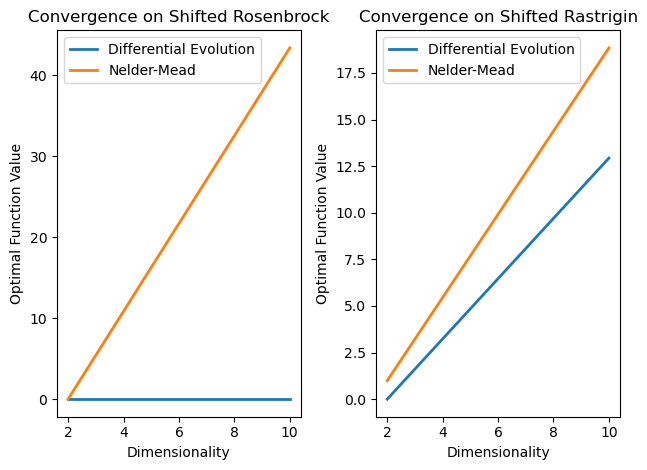

In [28]:
# Plot convergence curves  
plt.figure()  
for func_idx, func_name in enumerate(['Shifted Rosenbrock', 'Shifted Rastrigin']):  
    plt.subplot(1, 2, func_idx + 1)  
    for opt_idx, technique in enumerate(optimization_techniques):  
        plt.plot(dims, optimal_values[:, opt_idx, func_idx], label=technique, linewidth=2)  
    plt.title(f'Convergence on {func_name}')  
    plt.xlabel('Dimensionality')  
    plt.ylabel('Optimal Function Value')  
    plt.legend(loc='best')  
  
plt.tight_layout()  
plt.show()  